In [1]:
import pandas as pd
import numpy as np
import plotly.express as pe
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('Provision.csv')

In [15]:
df

,Account Number,Gross Outstanding,Gender,Age,Salaried,Date of Disbursement,Date of Default,Date of Provision,Provision Amount
0,GB00010283,2609860,Female,43,Non Salaried,18-08-2010,23-02-2015,24-05-2015,1565916
1,GB00010439,9720,Male,42,Non Salaried,24-02-2008,23-02-2011,24-05-2011,5832
2,GB00010499,12690,Female,38,Salaried,23-04-2010,18-02-2013,19-05-2013,7614
3,GB00010714,32150,Male,43,Non Salaried,20-01-2007,11-07-2012,09-10-2012,19290
4,GB00010792,12305250,Female,44,Salaried,30-01-2008,03-07-2010,01-10-2010,7383150
...,...,...,...,...,...,...,...,...,...
795,GB00099422,632570,Male,38,Salaried,02-06-2015,10-07-2016,08-10-2016,379542
796,GB00099476,60720,Female,32,Salaried,05-07-2002,13-12-2018,13-03-2019,36432
797,GB00099609,32430,Male,37,Salaried,09-11-2012,15-05-2016,13-08-2016,19458
798,GB00099658,5020720,Female,32,Salaried,21-04-2005,12-01-2018,12-04-2018,3012432


In [16]:
df['Gender'] = df['Gender'].replace({'Female' : 0, 'Male' : 1})
df['Salaried'] = df['Salaried'].replace({'Non Salaried' : 0, 'Salaried' : 1})

In [17]:
df

,Account Number,Gross Outstanding,Gender,Age,Salaried,Date of Disbursement,Date of Default,Date of Provision,Provision Amount
0,GB00010283,2609860,0,43,0,18-08-2010,23-02-2015,24-05-2015,1565916
1,GB00010439,9720,1,42,0,24-02-2008,23-02-2011,24-05-2011,5832
2,GB00010499,12690,0,38,1,23-04-2010,18-02-2013,19-05-2013,7614
3,GB00010714,32150,1,43,0,20-01-2007,11-07-2012,09-10-2012,19290
4,GB00010792,12305250,0,44,1,30-01-2008,03-07-2010,01-10-2010,7383150
...,...,...,...,...,...,...,...,...,...
795,GB00099422,632570,1,38,1,02-06-2015,10-07-2016,08-10-2016,379542
796,GB00099476,60720,0,32,1,05-07-2002,13-12-2018,13-03-2019,36432
797,GB00099609,32430,1,37,1,09-11-2012,15-05-2016,13-08-2016,19458
798,GB00099658,5020720,0,32,1,21-04-2005,12-01-2018,12-04-2018,3012432


In [18]:

df['Days between Start and Default'] = (pd.to_datetime(df['Date of Default']) - pd.to_datetime(df['Date of Disbursement']))
df['Months between Start and Default'] = pd.to_datetime(df['Date of Default']).dt.to_period('M').astype(int) - pd.to_datetime(df['Date of Disbursement']).dt.to_period('M').astype(int)
#df['Days between Start and Default'] = df['Days between Start and Default'].map(lambda x: x[:-5])
#df['Months between Start and Default'] = (pd.to_datetime(df['Date of Default'].to_period('M')) - pd.to_datetime(df['Date of Disbursement'].to_period('M'))).apply(lambda x: x.n)
#df['Months between Start and Default'] = (pd.to_datetime(df['Date of Default']) - pd.to_datetime(df['Date of Disbursement']))/np.timedelta64(1, 'M').astype(int) 
df['Days between Start and Default'] = df['Days between Start and Default'].dt.days

df

,Account Number,Gross Outstanding,Gender,Age,Salaried,Date of Disbursement,Date of Default,Date of Provision,Provision Amount,Days between Start and Default,Months between Start and Default
0,GB00010283,2609860,0,43,0,18-08-2010,23-02-2015,24-05-2015,1565916,1650,54
1,GB00010439,9720,1,42,0,24-02-2008,23-02-2011,24-05-2011,5832,1095,36
2,GB00010499,12690,0,38,1,23-04-2010,18-02-2013,19-05-2013,7614,1032,34
3,GB00010714,32150,1,43,0,20-01-2007,11-07-2012,09-10-2012,19290,2118,70
4,GB00010792,12305250,0,44,1,30-01-2008,03-07-2010,01-10-2010,7383150,767,26
...,...,...,...,...,...,...,...,...,...,...,...
795,GB00099422,632570,1,38,1,02-06-2015,10-07-2016,08-10-2016,379542,609,20
796,GB00099476,60720,0,32,1,05-07-2002,13-12-2018,13-03-2019,36432,6064,199
797,GB00099609,32430,1,37,1,09-11-2012,15-05-2016,13-08-2016,19458,1342,44
798,GB00099658,5020720,0,32,1,21-04-2005,12-01-2018,12-04-2018,3012432,4972,164


In [19]:
df.drop(["Account Number", "Date of Disbursement", "Date of Default", "Date of Provision", "Provision Amount", "Days between Start and Default"], axis = 1, inplace= True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Gross Outstanding                 800 non-null    int64
 1   Gender                            800 non-null    int64
 2   Age                               800 non-null    int64
 3   Salaried                          800 non-null    int64
 4   Months between Start and Default  800 non-null    int64
dtypes: int64(5)
memory usage: 31.4 KB


In [21]:
x = df.drop('Months between Start and Default', axis=1)
y = df['Months between Start and Default']

from sklearn.model_selection import train_test_split as tts
x_train, x_valid, y_train, y_valid = tts(x, y, train_size=0.7, random_state=1)

import warnings
warnings.filterwarnings("ignore")

In [23]:
#import required packages
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [24]:
model = KNR(n_neighbors = 3)
model.fit(x_train, y_train)  #fit the model


KNeighborsRegressor(n_neighbors=3)

In [26]:
y_pred = model.predict(x_valid) #make prediction on validation set
y_pred

array([ 23.33333333, 124.66666667,  44.66666667,  21.        ,
        56.        ,  73.33333333,  81.33333333,  32.        ,
        95.66666667,  31.66666667,  42.        ,  75.66666667,
        90.33333333, 102.33333333, 103.33333333,  97.66666667,
        93.33333333,  61.66666667,  51.        ,   4.66666667,
        47.66666667,  38.33333333,  92.66666667,  90.33333333,
        29.33333333,  53.66666667,  13.        ,  92.66666667,
        45.66666667,  91.33333333, 103.        ,  32.        ,
        75.66666667,  18.        , 116.33333333,  17.        ,
        87.        ,  26.66666667,  34.66666667,  80.        ,
       137.33333333,  54.66666667,  81.33333333,  35.66666667,
        95.33333333,  69.        ,  47.66666667,  46.66666667,
        93.        ,  99.33333333,  31.66666667,  95.66666667,
        64.        ,  75.33333333,  97.66666667,  88.66666667,
        95.        ,  73.66666667, 105.        ,  36.66666667,
        31.66666667, 149.33333333,  62.        ,  91.66

In [27]:
error = sqrt(mean_squared_error(y_valid,y_pred)) #calculate rmse
print (error)

63.26174682310876


In [28]:
### Run the process for different k values
rmse_val_list = [] #to store rmse values for different k

for K in range(30):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    y_pred = model.predict(x_valid) #make prediction on test set
    error = sqrt(mean_squared_error(y_valid, y_pred)) #calculate rmse
    print('RMSE value for k= ' , K , 'is:', error)
    
    rmse_val_list.append(error) #store rmse values
    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))


RMSE value for k=  1 is: 70.93247963145421
RMSE value for k=  2 is: 67.07352153917869
RMSE value for k=  3 is: 63.26174682310876
RMSE value for k=  4 is: 61.471696993413154
RMSE value for k=  5 is: 60.14743690853889
RMSE value for k=  6 is: 59.757530906154415
RMSE value for k=  7 is: 59.60722702496269
RMSE value for k=  8 is: 59.45983632181194
RMSE value for k=  9 is: 59.256847028449684
RMSE value for k=  10 is: 58.564164953208945
RMSE value for k=  11 is: 58.06605552650975
RMSE value for k=  12 is: 57.38637273310593
RMSE value for k=  13 is: 57.164177768258895
RMSE value for k=  14 is: 57.03991639260028
RMSE value for k=  15 is: 56.592981504384056
RMSE value for k=  16 is: 56.339808369939085
RMSE value for k=  17 is: 56.16123997927064
RMSE value for k=  18 is: 56.34604580245198
RMSE value for k=  19 is: 56.3499173111972
RMSE value for k=  20 is: 56.10458258912546
RMSE value for k=  21 is: 56.0436318557224
RMSE value for k=  22 is: 55.94907868760428
RMSE value for k=  23 is: 55.9839559

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
X_train = pd.DataFrame(data=x_train_scaled, columns = list(x_train.columns))

x_valid_scaled = scaler.transform(x_valid)
X_valid = pd.DataFrame(data=x_valid_scaled, columns = list(x_valid.columns))

In [30]:
X_valid.head()

,Gross Outstanding,Gender,Age,Salaried
0,0.001967,0.0,0.647059,1.0
1,0.073152,0.0,0.941176,0.0
2,0.003088,0.0,0.970588,1.0
3,0.000427,0.0,0.529412,1.0
4,0.000295,0.0,0.058824,1.0


In [31]:
rmse_val_list = list() #to store rmse values for different k

iter_len = len(x_valid)
iter_size = round(sqrt(iter_len))

for K in range(iter_size):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred = model.predict(X_valid) #make prediction on test set
    error = sqrt(mean_squared_error(y_valid, y_pred)) #calculate rmse
    #print('RMSE value for k= ' , K , 'is:', error)
    
    rmse_val_list.append(error) #store rmse values
    
print("The minimum error we get is ", min(rmse_val_list))
print("The corresponding K value is ", 1+rmse_val_list.index(min(rmse_val_list)))

The minimum error we get is  55.21705100983049
The corresponding K value is  15


In [32]:
iter_len = len(x_valid)
iter_size = round(sqrt(iter_len))

rmse_val_df = pd.DataFrame(columns=["K","Error"])
rmse_val_list = list() #to store rmse values for different k

for K in range(iter_size):
    K = K+1
    model = KNR(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    y_pred = model.predict(x_valid) #make prediction on test set
    error = sqrt(mean_squared_error(y_valid, y_pred)) #calculate rmse
    #print('RMSE value for k= ' , K , 'is:', error)
    rmse_val_list.append(error)
    
    rmse_val_df = rmse_val_df.append({'K':K,'Error':error}, ignore_index=True) # Storing the RMSE values in Data Frame
    
min_K = rmse_val_df.loc[rmse_val_df["Error"]==rmse_val_df["Error"].min()]
print("The optimal K value for the K-NN is ", int(min_K["K"]), " with minimum error as", rmse_val_df["Error"].min())

The optimal K value for the K-NN is  15  with minimum error as 56.592981504384056


<AxesSubplot:xlabel='K'>

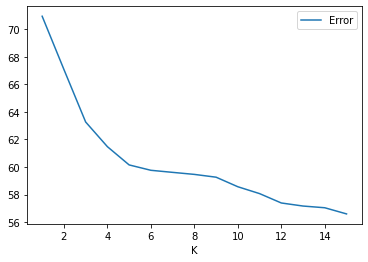

In [33]:
#curve=pd.DataFrame(rmse_val_list)
#curve.plot() # Elbow curve
curve = pd.DataFrame(rmse_val_df).set_index('K')
curve.plot()

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(x)
x_scaled = scaler.transform(x)
X = pd.DataFrame(data=x_scaled, columns = list(x.columns))

In [35]:
from sklearn import metrics
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [40]:
knn = KNR()

from sklearn.model_selection import cross_validate as cv
from sklearn.model_selection import GridSearchCV

cv_results = cv(knn, X,y,
                scoring = ('neg_mean_squared_error','neg_root_mean_squared_error'),
                cv=5, return_train_score = True)

In [41]:
print(sorted(cv_results.keys()))
print(cv_results['train_neg_root_mean_squared_error'])
print(cv_results['test_neg_root_mean_squared_error'])

['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_neg_root_mean_squared_error', 'train_neg_mean_squared_error', 'train_neg_root_mean_squared_error']
[-47.10939198 -49.60036038 -46.42652192 -48.75586183 -51.61033327]
[-64.85528313 -57.62931329 -65.08922914 -59.7701075  -48.15585115]


In [42]:
from sklearn.model_selection import GridSearchCV

#number_of_neighbors = range(1,200)
number_of_neighbors = range(1,iter_size)
cvals = 5

params = {'n_neighbors':number_of_neighbors}

model = GridSearchCV(knn, params, cv=cvals)
model.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 15)})

In [46]:
#number_of_neighbors = range(1,200)
number_of_neighbors = range(1,iter_size)
cvals = 5

params = {'n_neighbors':number_of_neighbors}

model = GridSearchCV(knn, params, scoring = 'neg_root_mean_squared_error', cv=cvals)
model.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 15)},
             scoring='neg_root_mean_squared_error')

In [47]:
print(model.best_params_)

{'n_neighbors': 14}


In [48]:
print(model)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 15)},
             scoring='neg_root_mean_squared_error')


In [45]:
model = KNR(n_neighbors=14)
model.fit(X,y)

KNeighborsRegressor(n_neighbors=14)